## Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore,boxcox
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics
import pickle

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)

Loading the dataset

In [2]:
columns=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv',names=columns)

Creating a DataFrame

In [4]:
df=pd.DataFrame(data=data)

Checking the DataFrame

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Checking the head of df

In [6]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


cheaking the tail of df

In [7]:
df.tail(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
594,LP002938,Male,Yes,0,Graduate,Yes,16120,0.0,260.0,360.0,1.0,Urban,Y
595,LP002940,Male,No,0,Not Graduate,No,3833,0.0,110.0,360.0,1.0,Rural,Y
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
598,LP002945,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,Y
599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y
602,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
603,LP002958,Male,No,0,Graduate,No,3676,4301.0,172.0,360.0,1.0,Rural,Y


Checking the shape of the dataset

In [8]:
df.shape

(614, 13)

Checking the data types

In [9]:
df.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount           float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
dtype: object

Checking the dataset information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Self_Employed       582 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         592 non-null    float64
 9   Loan_Amount_Term    600 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Checking the unique values of target

In [11]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In this dataset we need to build a model to predict the loan of the applicant will be approved or not i.e. Loan_Status on the basis of the details provided in the dataset. We observe the following points in the dataset. 
- There are total 614 rows and 13 columns.
- There are 3 types of data types present in the dataset i.e. object, int and float.
- Columns Dependents is of int tpye. However, it is in object type in the dataset. Hence, we need to convert dependent column into int.
- Column Loan_ID is an unique identifier and has no use in predicting the Loan_status. Hence we can drop the column.
- We observed that null values are present in the dataset.
- We need to predict the loan status in the dataset. Hence, the column Loan_Status is our target variable. 
- We can observe that the Loan_Status column is of object type with 'Y' and 'N' categories. Hence, we need to build classification model.

Checking for null values

In [12]:
df.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

Checking percentage of null values

In [13]:
null_percentage=df.isnull().mean()*100
null_percentage

Loan_ID               0.000000
Gender                2.117264
Married               0.488599
Dependents            2.442997
Education             0.000000
Self_Employed         5.211726
Applicant_Income      0.000000
Coapplicant_Income    0.000000
Loan_Amount           3.583062
Loan_Amount_Term      2.280130
Credit_History        8.143322
Property_Area         0.000000
Loan_Status           0.000000
dtype: float64

- Columns Gender, Married, Dependents, Self_Employed, Loan_Amount, Loan_Amount_Term and Credit History has null values present.
- Credit History column has the highest percent of null values i.e 8.14%.

Removing null values from Gender using mode

In [14]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

Removing null values from Married using mode

In [15]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

Removing null values from Dependents using mode

In [16]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

Removing null values from Self_Employed by creating new category Unknown

In [17]:
df['Self_Employed']=df['Self_Employed'].fillna('Unknown')

Removing null values from Loan_Amount using median

In [18]:
df['Loan_Amount']=df['Loan_Amount'].fillna(df['Loan_Amount'].median())

Removing null values from Loan_Amount_Term using mode

In [19]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

Removing null values from Credit History using mode

In [20]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

Verifying null value

In [21]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

-  All the null values has been removed from the dataset.

Checking unique values of dependent column

In [22]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

- We can observe that there are 4 types of values present in the depedent column i.e. 0, 1, 2 and 3+. Also null values present. 
- We can replace 3+ with 3.

Replacing 3+ with 3 in Dependents

In [23]:
df['Dependents']=df['Dependents'].replace('3+','3')

Typecasting Dependents column to int

In [24]:
df['Dependents']=df['Dependents'].astype(int)

Dropping column Loan_ID

In [25]:
df.drop('Loan_ID',axis=1,inplace=True)

Separating categorical and numerical columns

In [26]:
num_columns=[column for column in df.columns if df[column].dtypes!='O']
cat_columns=[column for column in df.columns if df[column].dtypes=='O']

Separating numerical columns into discrete and continuous

In [27]:
dis_columns=[column for column in num_columns if df[column].nunique()<=10]
con_columns=[column for column in num_columns if df[column].nunique()>10]

#### Data Visualisation

Univariate analysis

Visualizing continuous columns using hist plot

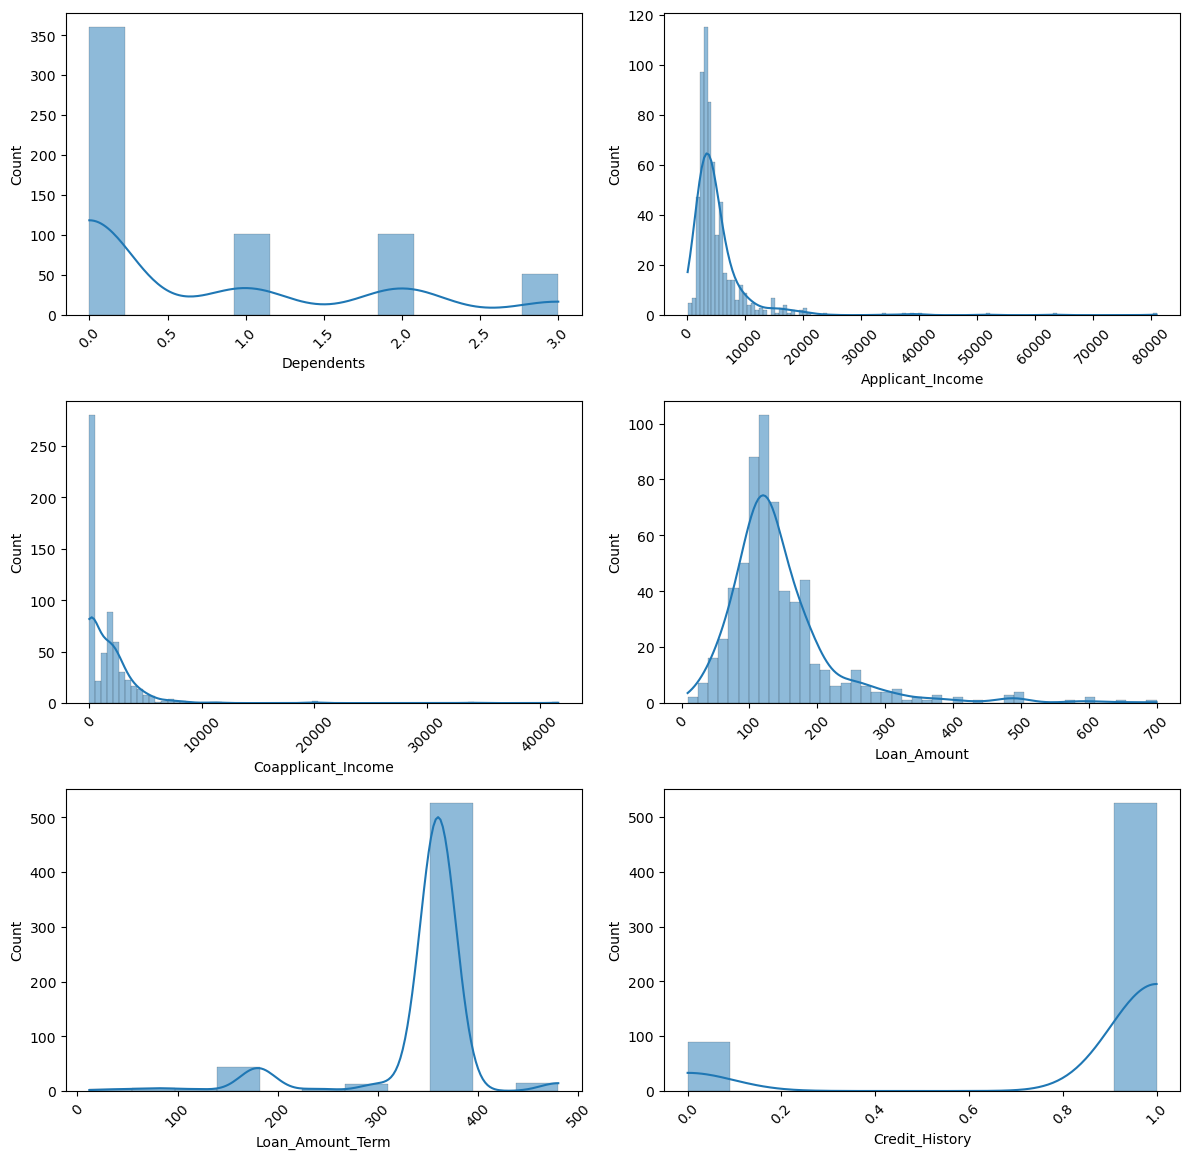

In [28]:
plt.figure(figsize=(12,15))
for index,column in enumerate(num_columns):
    if index<=(len(num_columns)):
        plt.subplot((len(num_columns)//2)+1,2,index+1)
        sns.histplot(x=column,kde=True,data=df,linewidth=.1)
        plt.xticks(rotation=45)
plt.tight_layout()

- We can observe that in column Dependents, count of applicants with 0 dependent is very high. Count of applicants with dependent 1 and 2 are almost same. Applicants with 3 dependents has the lowest count. Hence the column is right skewed.
- The column Applicant_Income is highly right skewed.
- We can observe right skewness in Coapplicant_Income.
- Right skewness is present in the column Loan_Amount.
- We can observe left skewness in the column Loan_Amount_Term
- Most of the applicants have credit history as 1 i.e high count of applicants have credit history as 1.

Visualising categorical columns using count plot

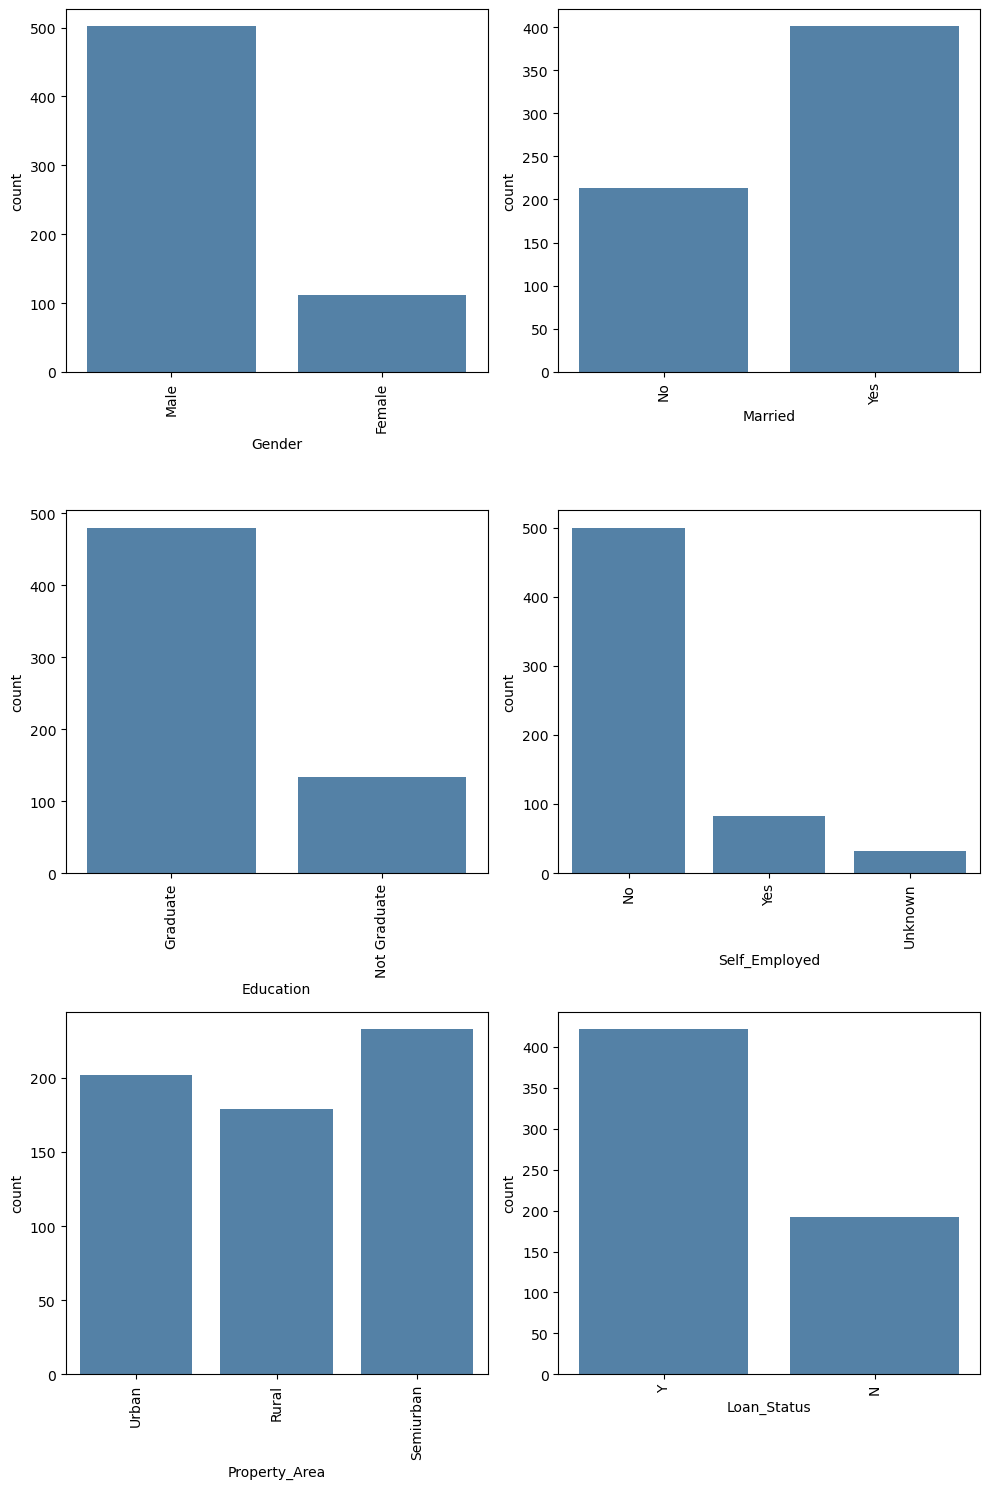

In [29]:
plt.figure(figsize=(10,15))
for index,column in enumerate(cat_columns):
    if index<=(len(cat_columns)):
        plt.subplot((len(cat_columns)+1)//2,2,index+1)
        sns.countplot(x=column, color='Steelblue',data=df)
        plt.xticks(rotation=90)
plt.tight_layout()

- Male applicants count is very high compared female applicants.
- Higher number of applicants are married in the Married column.
- In the Education column, a very high number of applicants are graduate than non-graduates.
- A very high count of employees are not self-employed. A low count of applicants are self-employed. A very low count of applicants employment is unknown.
- In Property_Area column, the counts of all the categories i.e. Urban, Rural and Semiurban are almost equally distributed.
- We can observe that count of Yes in Loan_Status is almost double than No.

Bivariate Analysis

Visualizing Loan_Status for each categorical column using countplot

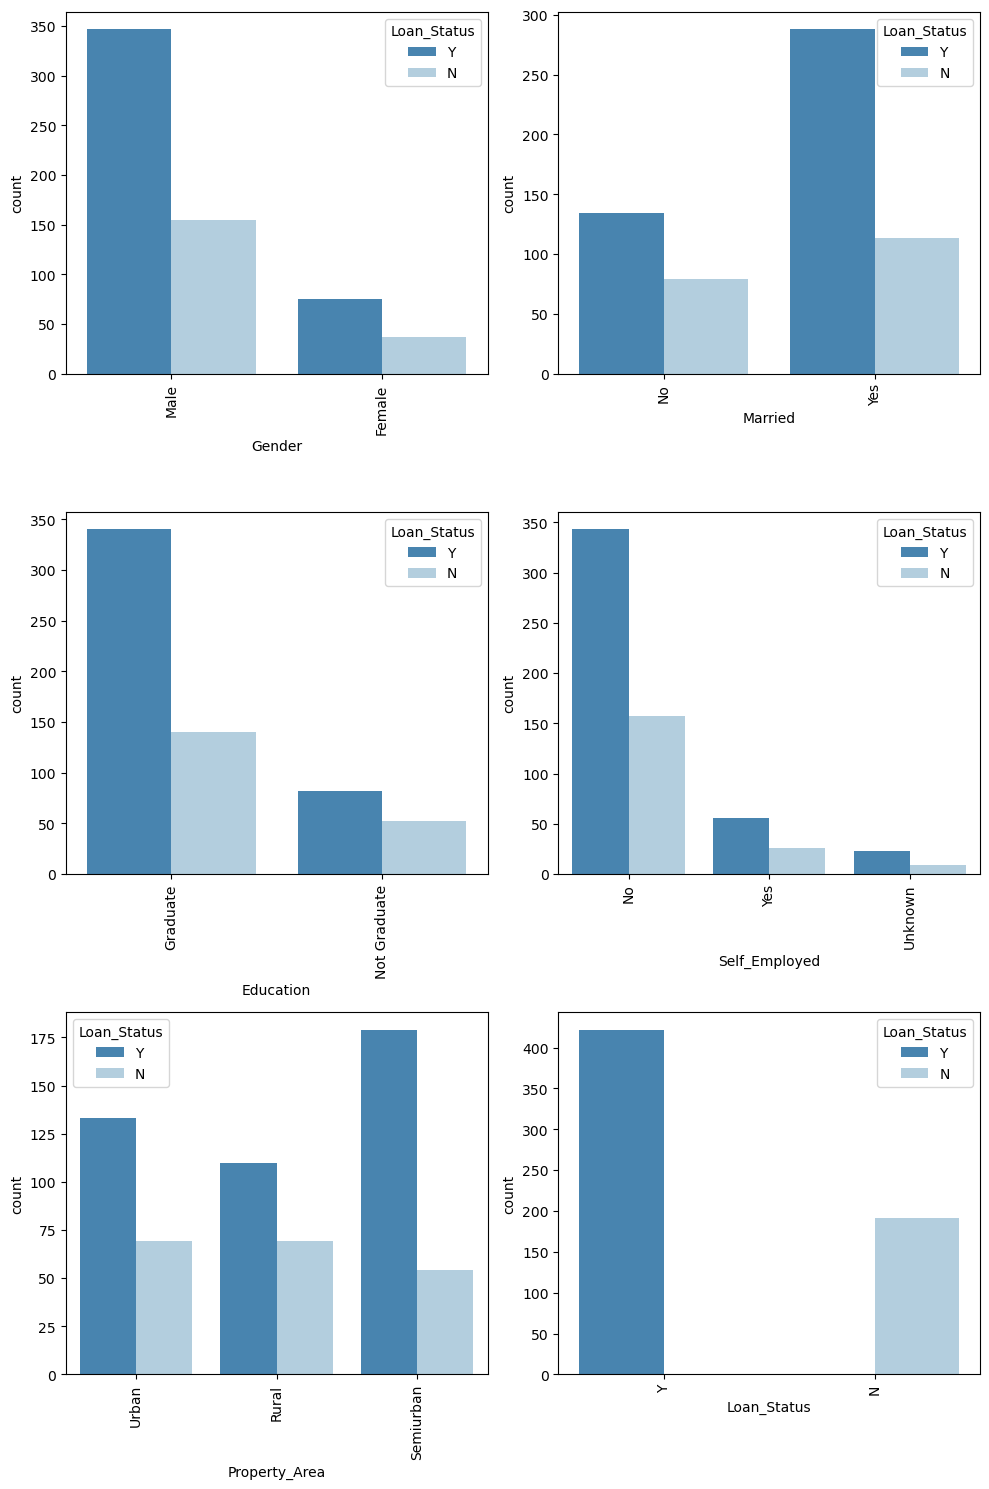

In [30]:
plt.figure(figsize=(10, 15))
for index,column in enumerate(cat_columns):
    if index<=(len(cat_columns)):
        plt.subplot(((len(cat_columns)+1)//2),2,index+1)
        sns.countplot(x=column,hue='Loan_Status',palette='Blues_r',data=df)
        plt.xticks(rotation=90)
plt.tight_layout()

- We can obserse ratio of Yes to loan is higher in both male and female. 
- The ratio of Yes is higher for both married and unmarried applicants. The count of yes to loan_status is higher among married applicants.
- Both graduate and not graduate applicants have Yes as Loan_Status. However, the ratio of Yes to No is higher amoung graduate compared to Not Graduate.
- We can observe both Yes and No of Loan_Status for all the 3 categories of Self_Employed. The count of Yes to Loan_Status is more throughout all categories.
- In Property_Area column, Semiurban has the highest count of Yes to Loan_Status compared to Urban and Rural. 

Visualizing Loan_Status among numerical columns

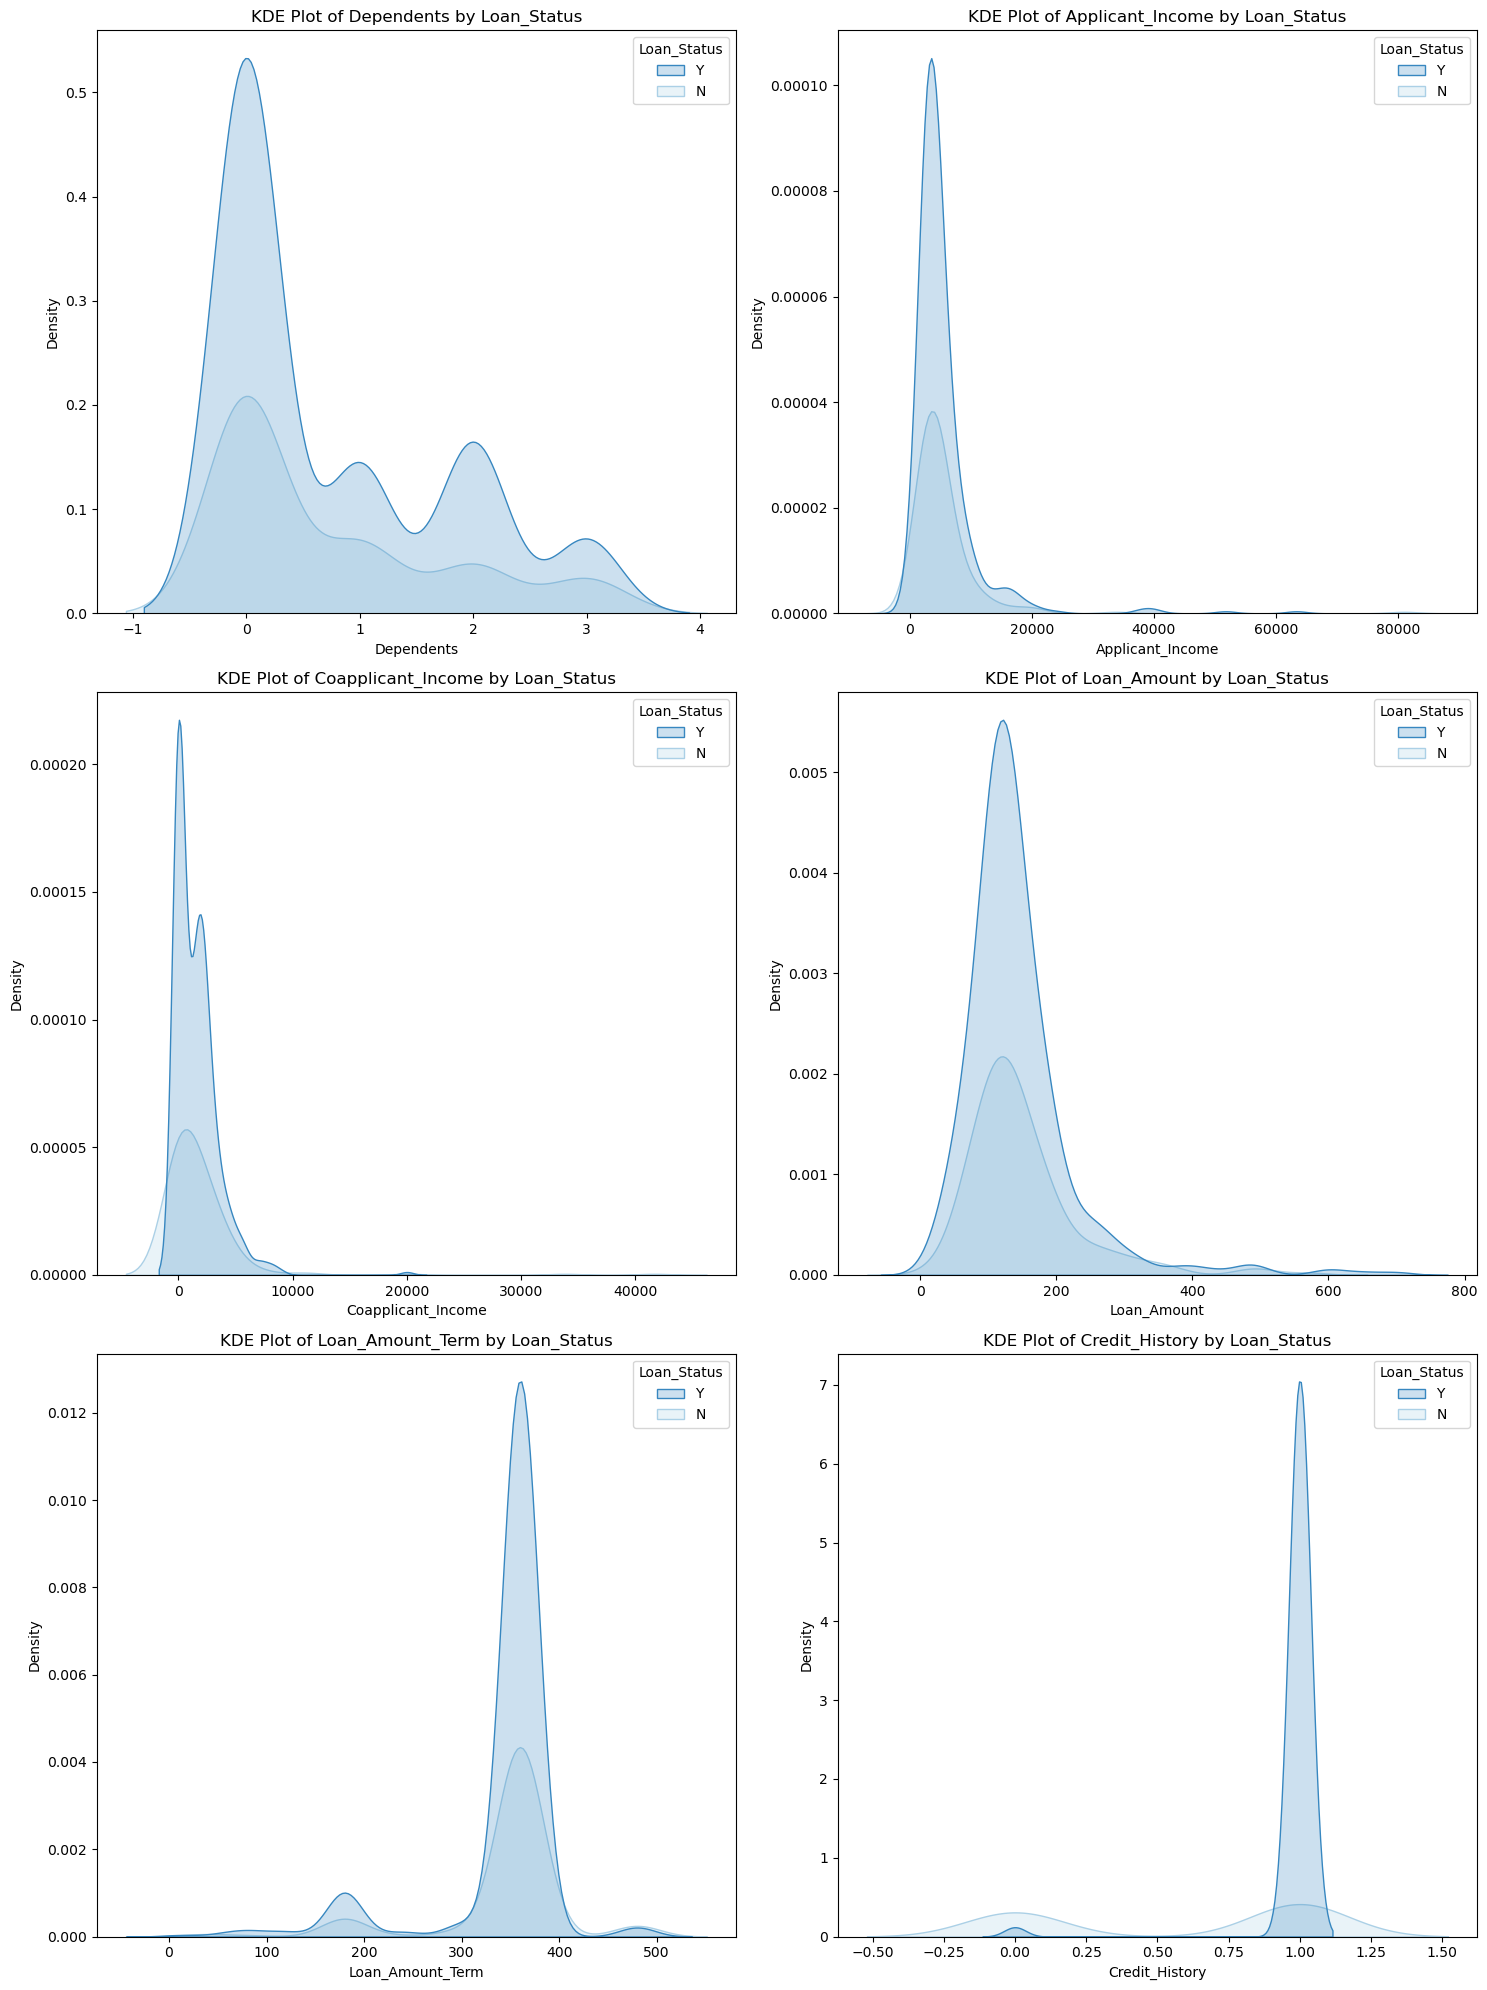

In [31]:
plt.figure(figsize=(15,20))
for index, column in enumerate(num_columns):
    plt.subplot((len(num_columns)+1)//2, 2, index+1)
    sns.kdeplot(data=df, x=column, hue='Loan_Status', fill=True, palette='Blues_r')
    plt.title(f'KDE Plot of {column} by Loan_Status')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

Multivariate analysis

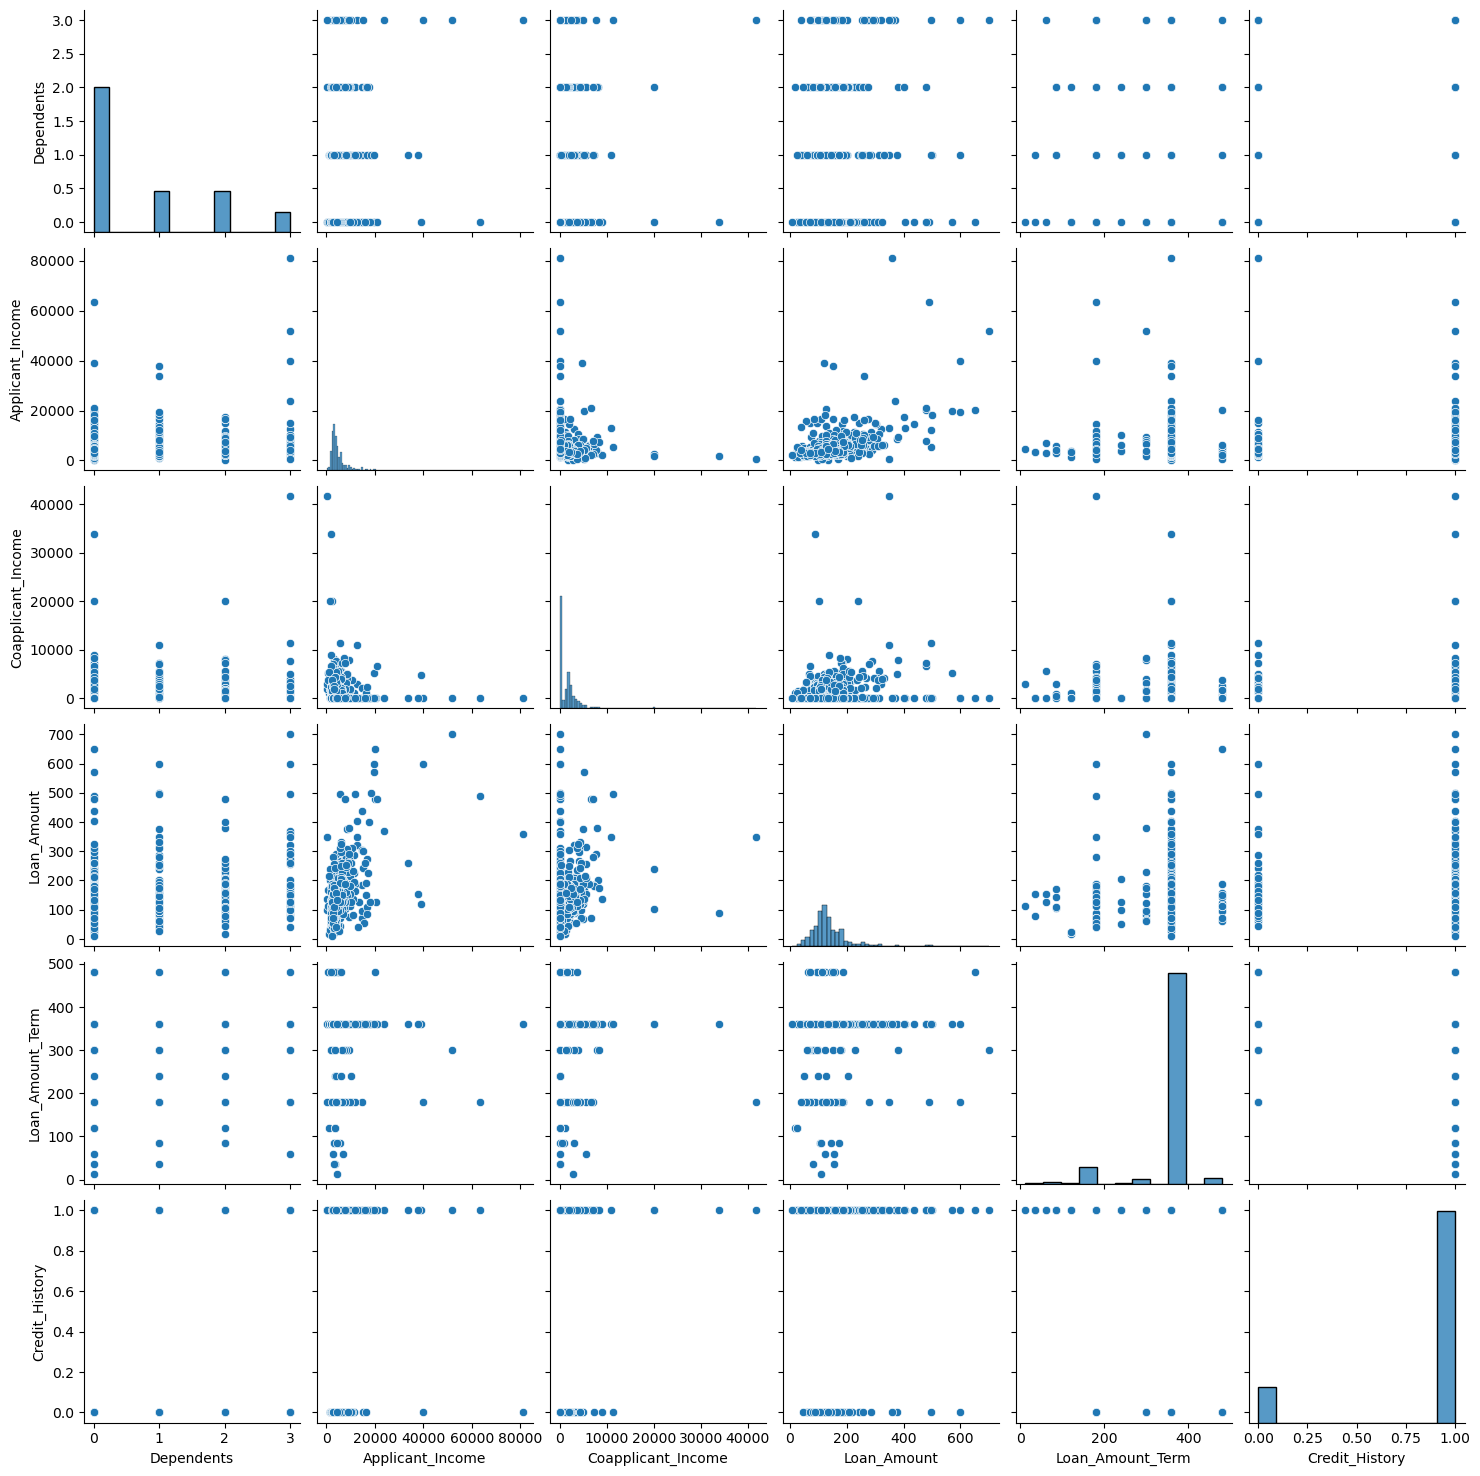

In [32]:
sns.pairplot(df)

#### Checking for outliers

Checking outliers using Boxplot

In [33]:
data=df.copy()

Analysing outliers of continuous columns using boxplot 

In [34]:
def outliers_boxplot(data):
    plt.figure(figsize=(10,15))
    for index,feature in enumerate(con_columns):
        plt.subplot((len(con_columns)//3)+1,3,index+1)
        sns.boxplot(data[feature],palette='deep',linewidth=.2)
        plt.xlabel(feature)
        plt.ticklabel_format(style='plain',axis='y')
    plt.tight_layout()

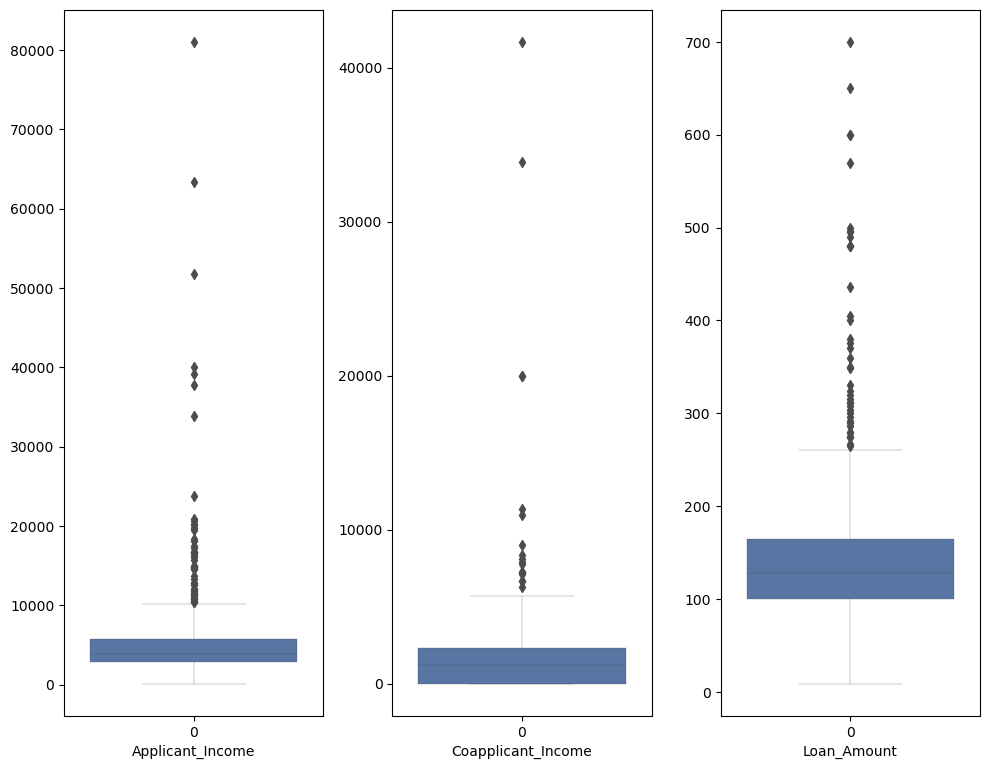

In [35]:
outliers_boxplot(data)

- We can observe outliers present in all the columns.

Analyzing outliers using zscore

In [36]:
def outliers_detection(data):
    z_score=np.abs(zscore(data[con_columns]))
    print(np.where(z_score>3))
    return z_score

In [37]:
z_score=outliers_detection(data)

(array([  9, 126, 130, 155, 155, 171, 171, 177, 177, 183, 185, 278, 308,
       333, 333, 369, 402, 409, 417, 432, 443, 487, 506, 523, 525, 561,
       581, 600, 604], dtype=int64), array([1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2,
       2, 2, 2, 2, 1, 1, 2], dtype=int64))


Removing outliers

In [38]:
def removing_outliers(z_score,data):
    data=data[(z_score<3).all(axis=1)]
    return data

In [39]:
data=removing_outliers(z_score,data)

Checking total data loss after removing outliers

In [40]:
total_data_loss=df.shape[0]-data.shape[0]
print('The total data lost due to outliers is:', total_data_loss)

The total data lost due to outliers is: 25


Checking total percentage of data loss after removing outliers

In [41]:
total_data=df.shape[0]
percent=total_data_loss*100/total_data
print('Total percentage of data lost is: {:.2f}%'.format(percent))

Total percentage of data lost is: 4.07%


Total data lost after outliers removal is 4.07% which is under acceptable range.

Checking outliers through IQR method

In [42]:
Q1 = df[con_columns].quantile(0.25)
Q3 = df[con_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (df[con_columns] >= lower_bound) & (df[con_columns] <= upper_bound)

df_no_outliers = df[bounds.all(axis=1)]

Checking total data lost using IQR

In [43]:
total_data_loss=df.shape[0]-df_no_outliers.shape[0]
print('The total data lost due to outliers is:', total_data_loss)

The total data lost due to outliers is: 79


Checking total percentage of data loss after removing outliers using IQR

In [44]:
total_data=df.shape[0]
percent=total_data_loss*100/total_data
print('Total percentage of data lost is: {:.2f}%'.format(percent))

Total percentage of data lost is: 12.87%


- Total data lost after outliers removal is 12.87% which is very high data loss.
- Hence we will use zscore to to remove outliers

Apply zscore to df

In [45]:
df=data.reset_index(drop=True)

Checking the revised shape of df

In [46]:
df.shape

(589, 12)

- The revised dataset has 589 rows and 12 columns

#### Statistical Analysis

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dependents,589.0,0.724958,0.996118,0.0,0.0,0.0,1.0,3.0
Applicant_Income,589.0,4649.770798,2944.018096,150.0,2873.0,3750.0,5503.0,20667.0
Coapplicant_Income,589.0,1415.660306,1653.363445,0.0,0.0,1229.0,2253.0,8980.0
Loan_Amount,589.0,134.663837,56.293199,9.0,100.0,128.0,160.0,380.0
Loan_Amount_Term,589.0,342.478778,64.398591,12.0,360.0,360.0,360.0,480.0
Credit_History,589.0,0.853990,0.353417,0.0,1.0,1.0,1.0,1.0


-

In [48]:
df.describe(include='O').T

,count,unique,top,freq
Gender,589,2,Male,480
Married,589,2,Yes,383
Education,589,2,Graduate,455
Self_Employed,589,3,No,484
Property_Area,589,3,Semiurban,222
Loan_Status,589,2,Y,407


-

#### Checking the skewness

In [49]:
df[con_columns].skew()

Applicant_Income      2.164762
Coapplicant_Income    1.353191
Loan_Amount           1.114173
dtype: float64

- We can observe skewness in all the 3 columns.

Applying sqrt to remove skewness

In [50]:
skewness_check_sqrt=np.sqrt(df[con_columns])
skewness_check_sqrt.skew()

Applicant_Income      1.214219
Coapplicant_Income    0.217598
Loan_Amount           0.268048
dtype: float64

Applying cbrt to remove skewness

In [51]:
skewness_check_cbrt=np.cbrt(df[con_columns])
skewness_check_cbrt.skew()

Applicant_Income      0.848471
Coapplicant_Income   -0.030379
Loan_Amount          -0.063834
dtype: float64

Applying log to remove skewness

In [52]:
skewness_check_log=np.log(df[con_columns])
skewness_check_log.skew()

Applicant_Income     -0.207659
Coapplicant_Income         NaN
Loan_Amount          -0.890116
dtype: float64

- In column Coapplicant Income and Loan_Amount, sqrt method will be used to remove skewness.
- In column Applicant Income, log method will be used to remove the skewness.

Applying sqrt to Coapplicant Income and Loan_Amount

In [53]:
df['Coapplicant_Income']=np.sqrt(df['Coapplicant_Income'])

In [54]:
df['Loan_Amount']=np.sqrt(df['Loan_Amount'])

Applying log to Applicant_Income

In [55]:
df['Applicant_Income']=np.log(df['Applicant_Income'])

Checking the skewness

In [56]:
df[con_columns].skew()

Applicant_Income     -0.207659
Coapplicant_Income    0.217598
Loan_Amount           0.268048
dtype: float64

- The skewness is now within the acceptable range.

#### Label Encoding of categorical columns

In [57]:
le=LabelEncoder()
df[cat_columns]=df[cat_columns].apply(lambda column: le.fit_transform(column))

Checking the dataset

In [58]:
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.000000,11.313708,360.0,1.0,2,1
1,1,1,1,0,0,8.430109,38.832976,11.313708,360.0,1.0,0,0
2,1,1,0,0,2,8.006368,0.000000,8.124038,360.0,1.0,2,1
3,1,1,0,1,0,7.856707,48.559242,10.954451,360.0,1.0,2,1
4,1,0,0,0,0,8.699515,0.000000,11.874342,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
584,0,0,0,0,0,7.972466,0.000000,8.426150,360.0,1.0,0,1
585,1,1,3,0,0,8.320205,0.000000,6.324555,180.0,1.0,0,1
586,1,1,1,0,0,8.996157,15.491933,15.905974,360.0,1.0,2,1
587,1,1,2,0,0,8.933664,0.000000,13.674794,360.0,1.0,2,1


- All the columns are now transformed into numerical columns.

#### Analysing the dataset through correlation

<Axes: >

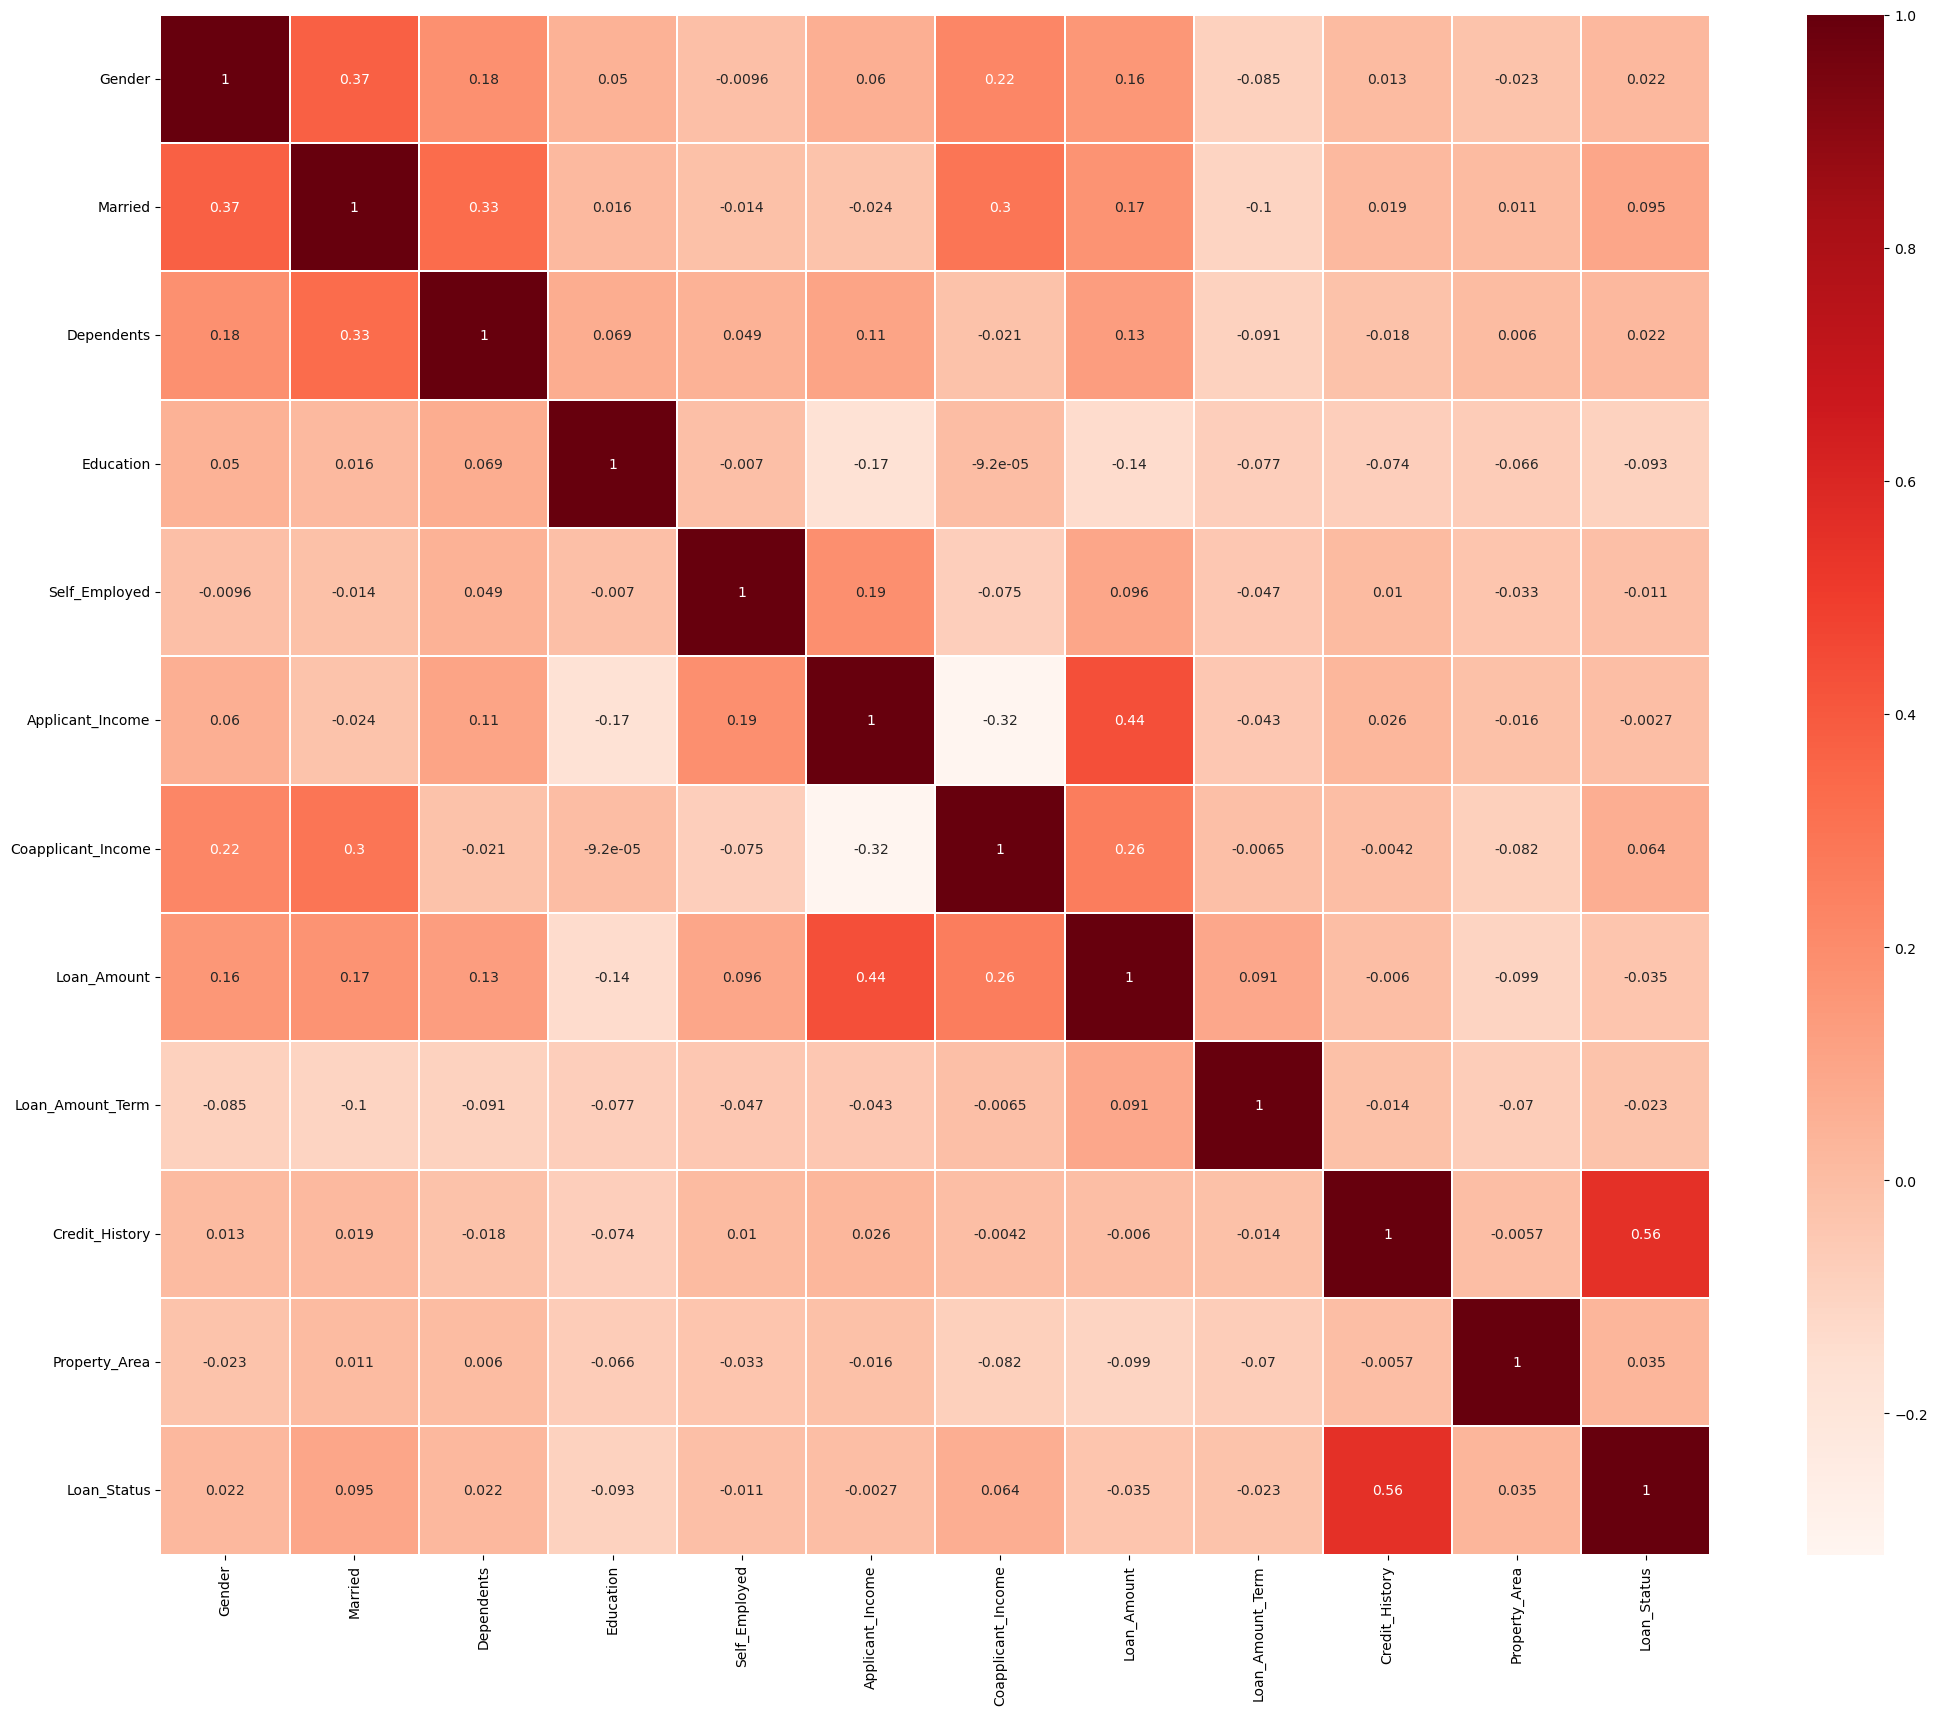

In [59]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,fmt='.2g',linewidth=.2,cmap='Reds')

- The Loan_Status column has moderate correlation with Credit_History. Not much correlation can be observed with other columns.
- A low correlation can be observed among Loan_amount and Applicant_Income.

#### Scaling the Dataset

Separating independent and target columns

In [60]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

Applying StandardScaler

In [61]:
def StandardScaling(x):
    ss=StandardScaler()
    x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
    return x

In [62]:
StandardScaling(x)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,0.476533,-1.363533,-0.728402,-0.542684,-0.447800,0.695813,-1.044301,-0.019154,0.272306,0.413490,1.222929
1,0.476533,0.733389,0.276349,-0.542684,-0.447800,0.254072,0.447988,-0.019154,0.272306,0.413490,-1.313356
2,0.476533,0.733389,-0.728402,-0.542684,2.466613,-0.513338,-1.044301,-1.363069,0.272306,0.413490,1.222929
3,0.476533,0.733389,-0.728402,1.842694,-0.447800,-0.784378,0.821753,-0.170521,0.272306,0.413490,1.222929
4,0.476533,-1.363533,-0.728402,-0.542684,-0.447800,0.741974,-1.044301,0.217060,0.272306,0.413490,1.222929
...,...,...,...,...,...,...,...,...,...,...,...
584,-2.098492,-1.363533,-0.728402,-0.542684,-0.447800,-0.574735,-1.044301,-1.235779,0.272306,0.413490,-1.313356
585,0.476533,0.733389,2.285851,-0.542684,-0.447800,0.055031,-1.044301,-2.121251,-2.525162,0.413490,-1.313356
586,0.476533,0.733389,0.276349,-0.542684,-0.447800,1.279202,-0.448971,1.915720,0.272306,0.413490,1.222929
587,0.476533,0.733389,1.281100,-0.542684,-0.447800,1.166027,-1.044301,0.975650,0.272306,0.413490,1.222929


#### Checking the Variance Inflation Factor

In [63]:
def vif_cal(x):
    vif=pd.DataFrame()
    vif['Features']=x.columns
    vif['VIF Factor']=[VIF(x.values,i) for i in range(x.shape[1])]
    return vif

In [64]:
vif_cal(x)

,Features,VIF Factor
0,Gender,6.567178
1,Married,3.939629
2,Dependents,1.808425
3,Education,1.319151
4,Self_Employed,1.239642
5,Applicant_Income,69.796510
6,Coapplicant_Income,2.726705
7,Loan_Amount,35.833567
8,Loan_Amount_Term,26.489866
9,Credit_History,6.811119


- Column Applicant_Income, Loan_Amount and Loan_Amount_Term has high variance factor.
- Hence we will drop the column Applicant_Income.

Dropping column Applicant_Income

In [65]:
x.drop('Applicant_Income',axis=1,inplace=True)

In [66]:
vif_cal(x)

,Features,VIF Factor
0,Gender,6.275402
1,Married,3.933139
2,Dependents,1.808206
3,Education,1.291215
4,Self_Employed,1.230208
5,Coapplicant_Income,2.535962
6,Loan_Amount,20.619621
7,Loan_Amount_Term,17.310838
8,Credit_History,6.180775
9,Property_Area,2.583656


- The column Loan_Amount and Loan_Amount_Term has high variance.
- Hence we will drop column Loan_Amount

In [67]:
x.drop('Loan_Amount',axis=1,inplace=True)

In [68]:
vif_cal(x)

,Features,VIF Factor
0,Gender,6.002524
1,Married,3.905392
2,Dependents,1.772990
3,Education,1.287649
4,Self_Employed,1.198400
5,Coapplicant_Income,2.390092
6,Loan_Amount_Term,9.048882
7,Credit_History,5.975351
8,Property_Area,2.570567


- Now the variance inflation factor is within the acceptable range.

#### Imbalance dataset check

Checking value counts of Attrition

In [69]:
y.value_counts()

Loan_Status
1    407
0    182
Name: count, dtype: int64

- We can observe that the dataset is imbalanced. Hence we need to apply SMOTE to make the dataset balanced.

Applying SMOTE to make the dataset balance

In [70]:
sm=SMOTE()
x,y=sm.fit_resample(x,y)

Checking value count of the dataset

In [71]:
y.value_counts()

Loan_Status
1    407
0    407
Name: count, dtype: int64

- Now the dataset is balanced and ready for modelling

### Modelling

Evaluating the best random_state using Logistic regression

In [72]:
def best_random_state(x,y):
    best_randomstate=0
    best_score=0
    
    lr=LogisticRegression()
    for rs in range (1,201):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rs)
        lr.fit(x_train,y_train)
        prediction=lr.predict(x_test)
        score=accuracy_score(y_test,prediction)
        
        if score>best_score:
            best_score=score
            best_randomstate=rs
    print('Accuracy score: {} and Random state: {}'.format(best_score, best_randomstate))

In [73]:
best_random_state(x,y)

Accuracy score: 0.7990196078431373 and Random state: 140


Spliting dataset into train and test

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=17)

Logistic regression model

In [75]:
def logistic_regression(x_train,x_test,y_train,y_test):
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_pred=lr.predict(x_test)
    
    acc_lr=accuracy_score(y_test,lr_pred)
    print('The accuracy using Logistic regression is: {:4f}% '.format((acc_lr)*100))
    print(confusion_matrix(y_test,lr_pred))
    print(classification_report(y_test,lr_pred))
    
    return lr_pred, acc_lr

In [76]:
lr_pred, acc_lr=logistic_regression(x_train,x_test,y_train,y_test)

The accuracy using Logistic regression is: 77.959184% 
[[ 71  50]
 [  4 120]]
              precision    recall  f1-score   support

           0       0.95      0.59      0.72       121
           1       0.71      0.97      0.82       124

    accuracy                           0.78       245
   macro avg       0.83      0.78      0.77       245
weighted avg       0.82      0.78      0.77       245



Support Vector Classification

In [77]:
def support_vector(x_train,x_test,y_train,y_test):
    svc=SVC()
    svc.fit(x_train,y_train)
    svc_pred=svc.predict(x_test)
    acc_svc=accuracy_score(y_test,svc_pred)
    
    print('The accuracy using SVC is: {:4f}% '.format((acc_svc)*100))
    print(confusion_matrix(y_test,svc_pred))
    print(classification_report(y_test,svc_pred))
    
    return svc_pred, acc_svc

In [78]:
svc_pred, acc_svc=support_vector(x_train,x_test,y_train,y_test)

The accuracy using SVC is: 49.387755% 
[[121   0]
 [124   0]]
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       121
           1       0.00      0.00      0.00       124

    accuracy                           0.49       245
   macro avg       0.25      0.50      0.33       245
weighted avg       0.24      0.49      0.33       245



Random Forest Classifier

In [79]:
def random_forest(x_train,x_test,y_train,y_test):
    
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    rfc_pred=rfc.predict(x_test)
    
    acc_rfc=accuracy_score(y_test,rfc_pred)
    print('The accuracy using Random Forest is: {:4f}% '.format((accuracy_score(y_test,rfc_pred))*100))
    print(confusion_matrix(y_test,rfc_pred))
    print(classification_report(y_test,rfc_pred))
    
    return rfc_pred,acc_rfc

In [80]:
rfc_pred,acc_rfc = random_forest(x_train,x_test,y_train,y_test)

The accuracy using Random Forest is: 78.367347% 
[[ 89  32]
 [ 21 103]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       121
           1       0.76      0.83      0.80       124

    accuracy                           0.78       245
   macro avg       0.79      0.78      0.78       245
weighted avg       0.79      0.78      0.78       245



Adaboost Classifier

In [81]:
def adaboost(x_train,x_test,y_train,y_test):
    
    abc=AdaBoostClassifier()
    abc.fit(x_train,y_train)
    abc_pred=abc.predict(x_test)
    
    acc_abc=accuracy_score(y_test,abc_pred)
    print('The accuracy using Adaboost is: {:4f}% '.format((accuracy_score(y_test,abc_pred))*100))
    print(confusion_matrix(y_test,abc_pred))
    print(classification_report(y_test,abc_pred))
    
    return abc_pred, acc_abc

In [82]:
abc_pred, acc_abc = adaboost(x_train,x_test,y_train,y_test)

The accuracy using Adaboost is: 79.183673% 
[[ 78  43]
 [  8 116]]
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       121
           1       0.73      0.94      0.82       124

    accuracy                           0.79       245
   macro avg       0.82      0.79      0.79       245
weighted avg       0.82      0.79      0.79       245



Gradient Boost Classifier

In [83]:
def gradientboost(x_train,x_test,y_train,y_test):
    
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train,y_train)
    gbc_pred=gbc.predict(x_test)
    
    acc_gbc=accuracy_score(y_test,gbc_pred)
    print('The accuracy using Gradientboost is: {:4f}% '.format((accuracy_score(y_test,gbc_pred))*100))
    print(confusion_matrix(y_test,gbc_pred))
    print(classification_report(y_test,gbc_pred))
    
    return gbc_pred,acc_gbc

In [84]:
gbc_pred, acc_gbc = gradientboost(x_train,x_test,y_train,y_test)

The accuracy using Gradientboost is: 82.040816% 
[[ 86  35]
 [  9 115]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       121
           1       0.77      0.93      0.84       124

    accuracy                           0.82       245
   macro avg       0.84      0.82      0.82       245
weighted avg       0.84      0.82      0.82       245



Bagging classifier

In [85]:
def baggingclassifier(x_train,x_test,y_train,y_test):
    
    bc=BaggingClassifier()
    bc.fit(x_train,y_train)
    bc_pred=bc.predict(x_test)
    
    acc_bc=accuracy_score(y_test,bc_pred)
    print('The accuracy using Bagging classfier is: {:4f}% '.format((accuracy_score(y_test,bc_pred))*100))
    print(confusion_matrix(y_test,bc_pred))
    print(classification_report(y_test,bc_pred))
    
    return bc_pred,acc_bc

In [86]:
bc_pred, acc_bc = baggingclassifier(x_train,x_test,y_train,y_test)

The accuracy using Bagging classfier is: 78.367347% 
[[ 92  29]
 [ 24 100]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       121
           1       0.78      0.81      0.79       124

    accuracy                           0.78       245
   macro avg       0.78      0.78      0.78       245
weighted avg       0.78      0.78      0.78       245



ExtraTree classifier

In [87]:
def extratree_classifier(x_train,x_test,y_train,y_test):
    
    etc=ExtraTreesClassifier()
    etc.fit(x_train,y_train)
    etc_pred=etc.predict(x_test)
    
    acc_etc=accuracy_score(y_test,etc_pred)
    print('The accuracy using Extratrees is: {:4f}% '.format((accuracy_score(y_test,etc_pred))*100))
    print(confusion_matrix(y_test,etc_pred))
    print(classification_report(y_test,etc_pred))
    
    return etc_pred, acc_etc

In [88]:
etc_pred, acc_etc=extratree_classifier(x_train,x_test,y_train,y_test)

The accuracy using Extratrees is: 77.959184% 
[[93 28]
 [26 98]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       121
           1       0.78      0.79      0.78       124

    accuracy                           0.78       245
   macro avg       0.78      0.78      0.78       245
weighted avg       0.78      0.78      0.78       245



DecisionTree classifier

In [89]:
def decisiontree_classifier(x_train,x_test,y_train,y_test):
    
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    dtc_pred=dtc.predict(x_test)
    
    acc_dtc=accuracy_score(y_test,dtc_pred)
    print('The accuracy using Decisiontree is: {:4f}% '.format((accuracy_score(y_test,dtc_pred))*100))
    print(confusion_matrix(y_test,dtc_pred))
    print(classification_report(y_test,dtc_pred))
    
    return dtc_pred, acc_dtc

In [90]:
dtc_pred, acc_dtc = decisiontree_classifier(x_train,x_test,y_train,y_test)

The accuracy using Decisiontree is: 75.918367% 
[[94 27]
 [32 92]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       121
           1       0.77      0.74      0.76       124

    accuracy                           0.76       245
   macro avg       0.76      0.76      0.76       245
weighted avg       0.76      0.76      0.76       245



KNN classifier

In [91]:
def knn(x_train,x_test,y_train,y_test):
    
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    knn_pred=knn.predict(x_test)
    
    acc_knn=accuracy_score(y_test,knn_pred)
    print('The accuracy using KNN is: {:4f}% '.format((accuracy_score(y_test,knn_pred))*100))
    print(confusion_matrix(y_test,knn_pred))
    print(classification_report(y_test,knn_pred))
    
    return knn_pred, acc_knn

In [92]:
knn_pred, acc_knn = knn(x_train,x_test,y_train,y_test)

The accuracy using KNN is: 66.122449% 
[[86 35]
 [48 76]]
              precision    recall  f1-score   support

           0       0.64      0.71      0.67       121
           1       0.68      0.61      0.65       124

    accuracy                           0.66       245
   macro avg       0.66      0.66      0.66       245
weighted avg       0.66      0.66      0.66       245



Ridge Classifier

In [93]:
def ridge(x_train,x_test,y_train,y_test):
    
    rd=RidgeClassifier()
    rd.fit(x_train,y_train)
    rd_pred=rd.predict(x_test)
    
    acc_rd=accuracy_score(y_test,rd_pred)
    print('The accuracy using Ridge is: {:4f}% '.format((accuracy_score(y_test,rd_pred))*100))
    print(confusion_matrix(y_test,rd_pred))
    print(classification_report(y_test,rd_pred))
    
    return rd_pred, acc_rd

In [94]:
rd_pred, acc_rd = ridge(x_train,x_test,y_train,y_test)

The accuracy using Ridge is: 75.510204% 
[[ 64  57]
 [  3 121]]
              precision    recall  f1-score   support

           0       0.96      0.53      0.68       121
           1       0.68      0.98      0.80       124

    accuracy                           0.76       245
   macro avg       0.82      0.75      0.74       245
weighted avg       0.82      0.76      0.74       245



#### Cross Validating the models

In [95]:
def cross_validation(x,y,*args):
    
    # Cross validation for Logistic Regression
    lr=LogisticRegression()
    lr_score=cross_val_score(lr,x,y)
    diff_lr=accuracy_score(y_test,lr_pred)-lr_score.mean()
    
    # Cross SVC
    svc=SVC()
    svc_score=cross_val_score(svc,x,y)
    diff_svc=accuracy_score(y_test,svc_pred)-svc_score.mean()
    
    # Cross validation for RandomForestClassifier
    rfc=RandomForestClassifier()
    rfc_score=cross_val_score(rfc,x,y)
    diff_rfc=accuracy_score(y_test,rfc_pred)-rfc_score.mean()
    
    # Cross validation for AdaBoostClassifier
    abc=AdaBoostClassifier()
    abc_score=cross_val_score(abc,x,y)
    diff_abc=accuracy_score(y_test,abc_pred)-abc_score.mean()
    
    # Cross validation for GradientBoostingClassifier
    gbc=GradientBoostingClassifier()
    gbc_score=cross_val_score(gbc,x,y)
    diff_gbc=accuracy_score(y_test,gbc_pred)-gbc_score.mean()
    
    # Cross validation for BaggingClassifier
    bc=BaggingClassifier()
    bc_score=cross_val_score(bc,x,y)
    diff_bc=accuracy_score(y_test,bc_pred)-bc_score.mean()
    
    # Cross validation for ExtraTreesClassifier
    etc=ExtraTreesClassifier()
    etc_score=cross_val_score(etc,x,y)
    diff_etc=accuracy_score(y_test,etc_pred)-etc_score.mean()
    
    # Cross validation for DecisionTreeClassifier
    dtc=DecisionTreeClassifier()
    dtc_score=cross_val_score(dtc,x,y)
    diff_dtc=accuracy_score(y_test,dtc_pred)-dtc_score.mean()
    
    # Cross validation for KNeighborsClassifier
    knn=KNeighborsClassifier()
    knn_score=cross_val_score(knn,x,y)
    diff_knn=accuracy_score(y_test,knn_pred)-knn_score.mean()
    
    # Cross validation for RidgeClassifier
    rd=RidgeClassifier()
    rd_score=cross_val_score(rd,x,y)
    diff_rd=accuracy_score(y_test,rd_pred)-rd_score.mean()
    
    df=pd.DataFrame({'Classification Name':['Logistic Regression',
                                        'SVC',
                                        'RandomForestClassifier',
                                        'AdaBoostClassifier',
                                        'GradientBoostingClassifier',
                                        'BaggingClassifier',
                                        'ExtraTreesClassifier',
                                        'DecisionTreeClassifier',
                                        'KNeighborsClassifier',
                                        'RidgeClassfier'],
                     'Classification Score':[acc_lr, acc_svc, acc_rfc, acc_abc, acc_gbc, acc_bc, acc_etc, acc_dtc, acc_knn,acc_rd],
                     'Cross Val Score':[lr_score.mean(), 
                                        svc_score.mean(), 
                                        rfc_score.mean(), 
                                        abc_score.mean(), 
                                        gbc_score.mean(), 
                                        bc_score.mean(), 
                                        etc_score.mean(), 
                                        dtc_score.mean(), 
                                        knn_score.mean(),
                                        rd_score.mean()],
                     'Difference': [diff_lr, diff_svc, diff_rfc, diff_abc, diff_gbc, diff_bc, diff_etc, diff_dtc, diff_knn, diff_rd]
                    })
    return df

In [96]:
model_pred=[lr_pred, svc_pred, rfc_pred, abc_pred, gbc_pred, bc_pred, etc_pred, dtc_pred, knn_pred]

In [97]:
cross_validation(x,y,model_pred)

,Classification Name,Classification Score,Cross Val Score,Difference
0,Logistic Regression,0.779592,0.735924,0.043668
1,SVC,0.493878,0.502424,-0.008546
2,RandomForestClassifier,0.783673,0.771575,0.012099
3,AdaBoostClassifier,0.791837,0.762993,0.028843
4,GradientBoostingClassifier,0.820408,0.772824,0.047584
5,BaggingClassifier,0.783673,0.754366,0.029307
6,ExtraTreesClassifier,0.779592,0.759267,0.020325
7,DecisionTreeClassifier,0.759184,0.737143,0.022041
8,KNeighborsClassifier,0.661224,0.690426,-0.029202
9,RidgeClassfier,0.755102,0.745770,0.009332


- The RandomForestClassifier has high classification and has the highest cross-validation scores and a small difference indicating better cross-validation performance. It indicates that the model generalizes well and is likely to perform effectively on unseen data.
- Based on this analysis the RandomForestClassifier is the best model.

#### Hyper parameter tuning

Creating the parameter list

In [98]:
parameters = {'n_estimators': [50,100, 200],
              'random_state': [17,42,45,70],
              'max_depth': [None, 10, 20, 30],
              'max_features': ['auto', 'sqrt', 'log2'],
              'n_jobs':[-2, -1, 1],
              'criterion':['criterion','gini']
             }

In [99]:
gridsearch_cv=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
gridsearch_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['criterion', 'gini'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200], 'n_jobs': [-2, -1, 1],
                         'random_state': [17, 42, 45, 70]})

Checking the parameters

In [100]:
gridsearch_cv.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 45}

## Creating the final model

In [101]:
def final_model_rfc(x_train,x_test,y_train,y_test):
    final_model=RandomForestClassifier(criterion='gini',max_depth=10,max_features='auto',n_estimators=50,n_jobs=-2,random_state=70)
    final_model.fit(x_train,y_train)
    prediction=final_model.predict(x_test)
    accuracy=accuracy_score(y_test,prediction)
    
    print('The final accuracy is: {:.2f}%'.format((accuracy)*100))
    
    return final_model, prediction, accuracy

In [102]:
final_model, prediction, accuracy=final_model_rfc(x_train,x_test,y_train,y_test)

The final accuracy is: 80.41%


#### Plotting ROC curve and comparing AUC

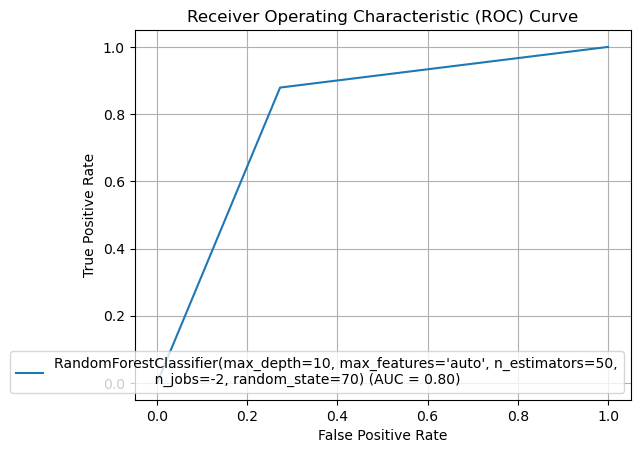

In [103]:
fpr,tpr, thresholds=metrics.roc_curve(y_test,prediction)
roc_auc=metrics.auc(fpr,tpr)
disp=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
disp.plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

## Saving the Model

In [104]:
file='Loan_prediction.pkl'
pickle.dump(final_model,open(file,'wb'))